In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### NB

In [9]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

X = pd.read_csv('final_training_data.csv', index_col=0).drop(columns=['grade', 'username'])
y = pd.read_csv('final_training_data.csv').loc[:,'grade'] #1 is failed grade, 0 is pass
print(y.value_counts())

scaler = preprocessing.StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

pipeline = make_pipeline(preprocessing.StandardScaler(), SelectFromModel(LogisticRegression(), max_features=40, threshold=-np.inf), GaussianNB())
scoring = ['average_precision', 'roc_auc', 'precision', 'recall', 'f1', 'accuracy']

param_grid = [
  {'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)},
 ]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='average_precision')
grid_search.fit(X, y)

print("Best parameters: {}".format(grid_search.best_params_))
print(f'Best score: {grid_search.best_score_}')

0    183
1     37
Name: grade, dtype: int64
Best parameters: {'gaussiannb__var_smoothing': 0.0533669923120631}
Best score: 0.5630829089819237


aucpr: 0.1543560606060606
aucroc: 0.6185344827586207


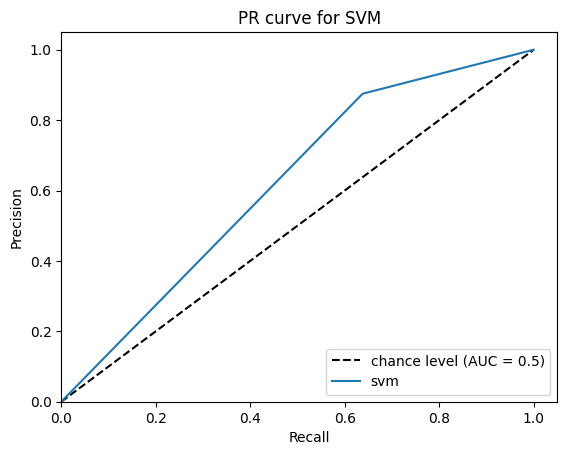

In [7]:
y_pr=grid_search.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pr)
print(f"aucpr: {metrics.average_precision_score(y_test, y_pr)}")
print(f"aucroc: {metrics.roc_auc_score(y_test, y_pr)}")
#print(f"precision: {metrics.precision_score(y_test, y_pr)}")
#print(f"recall: {metrics.recall_score(y_test, y_pr)}")
#print(f"f1: {metrics.f1_score(y_test, y_pr)}")
plt.plot([0,1], [0,1], 'k--', label="chance level (AUC = 0.5)")
plt.plot(fpr, tpr, label="svm")
plt.legend(loc="lower right", prop={'size': 10})
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve for SVM')
plt.show()

In [10]:
pd.DataFrame(grid_search.cv_results_).to_csv('nb_results.csv')
#pd.DataFrame(tpr).to_csv('tpr_nb.csv')
#pd.DataFrame(fpr).to_csv('fpr_nb.csv')